#                                     《交通数据处理方法》实验1

#                                        1173200618 赵沛霖

### 加载numpy、pandas、matplotlib程序包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 读取并查看数据

In [2]:
tra=pd.read_excel('C:/Users/DELL/Desktop/桌面文件夹/交通数据处理方法/Pandas&matplotlib/TrafficData_excel.xlsx')
tra.head(5)

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
0,1,1,536.0,43.0,85.0
1,1,2,516.0,83.0,86.0
2,1,3,606.0,62.0,70.0
3,1,4,661.0,73.0,NaN
4,1,5,633.0,78.0,80.0


In [3]:
tra.info() #查看数据整体情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   时间段(5min)   203 non-null    int64  
 1   station     203 non-null    int64  
 2   流量(veh/h)   201 non-null    float64
 3   时间占有率(%)    202 non-null    float64
 4   平均车速(km/h)  202 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.1 KB


In [4]:
tra.values #查看所有的值

array([[  1.,   1., 536.,  43.,  85.],
       [  1.,   2., 516.,  83.,  86.],
       [  1.,   3., 606.,  62.,  70.],
       ...,
       [ 10.,  20., 614.,  81.,  85.],
       [  5.,  11., 675.,  42.,  87.],
       [ 10.,  15., 605.,  55.,  63.]])

In [5]:
tra.columns #查看列名

Index(['时间段(5min)', 'station', '流量(veh/h)', '时间占有率(%)', '平均车速(km/h)'], dtype='object')

### 数据预处理——重复值处理

In [6]:
tra[tra.duplicated()==True] #查看重复值

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
76,4,16,538.0,63.0,82.0
201,5,11,675.0,42.0,87.0
202,10,15,605.0,55.0,63.0


In [7]:
tra=tra.drop_duplicates() #删除重复值

In [8]:
tra[tra.duplicated()==True] #查看重复值，发现无重复值

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)


### 数据预处理——缺失值处理

In [9]:
tra[tra.isnull().values==True] #查看缺失值

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
3,1,4,661.0,73.0,NaN
12,1,13,NaN,49.0,66.0
32,2,13,598.0,NaN,79.0
52,3,13,NaN,89.0,74.0


对station4进行缺失值处理

In [10]:
tra4=tra[tra.station==4] #查看station4的缺失数据的情况
tra4

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
3,1,4,661.0,73.0,NaN
23,2,4,648.0,87.0,66.0
43,3,4,567.0,40.0,80.0
63,4,4,557.0,60.0,67.0
84,5,4,569.0,41.0,78.0
104,6,4,632.0,57.0,60.0
124,7,4,672.0,76.0,79.0
144,8,4,577.0,63.0,87.0
164,9,4,676.0,46.0,89.0
184,10,4,603.0,52.0,73.0


In [11]:
# 准备填充平均车速的缺失值的训练集
tra4_clean = tra4.dropna()

#数据标准化
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(tra4_clean[['流量(veh/h)','时间占有率(%)']])
tra4_clean[['流量(veh/h)','时间占有率(%)']] = scaler.transform(tra4_clean[['流量(veh/h)','时间占有率(%)']])
tra4_clean

E:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
23,2,4,0.831868,1.951242,66.0
43,3,4,-1.000253,-1.211116,80.0
63,4,4,-1.226440,0.134568,67.0
84,5,4,-0.955015,-1.143831,78.0
104,6,4,0.469968,-0.067284,60.0
124,7,4,1.374719,1.211116,79.0
144,8,4,-0.774065,0.336421,87.0
164,9,4,1.465194,-0.807410,89.0
184,10,4,-0.185977,-0.403705,73.0


In [12]:
# 划分自变量和因变量，将时间占有率、平均速度作为自变量，流量作为因变量
tra4_clean_X = tra4_clean.drop(columns=['时间段(5min)','station','平均车速(km/h)'])
tra4_clean_y = tra4_clean['平均车速(km/h)']

In [13]:
# 准备模型填充，计划实验RF和Lasso两种算法
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

rfr = RandomForestRegressor(n_estimators=10)
lasso = Lasso(alpha=0.01)

#并采用交叉验证来计算MSE，进而评估模型
from sklearn.model_selection import cross_val_score

In [14]:
# 5折交叉验证计算随机森林模型的MSE
rfr_cv = cross_val_score(rfr,tra4_clean_X,tra4_clean_y,scoring='neg_mean_squared_error',cv=5)
rfr_cv.mean()

-67.94299999999994

In [15]:
# 5折交叉验证计算Lasso模型的MSE
lasso_cv = cross_val_score(lasso,tra4_clean_X,tra4_clean_y,scoring='neg_mean_squared_error',cv=5)
lasso_cv.mean()

-99.08788009797158

In [16]:
#模型匹配
rfr.fit(tra4_clean_X,tra4_clean_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
# 准备预测平均车速缺失值的训练集
tra4_clean_na = tra4.loc[tra4['平均车速(km/h)'].isna(),:]
#数据标准化
tra4_clean[['流量(veh/h)','时间占有率(%)']] = scaler.transform(tra4_clean[['流量(veh/h)','时间占有率(%)']])

E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
# 标记用于预测的自变量X
tra4_clean_na_X = tra4_clean_na.drop(columns=['时间段(5min)','station','平均车速(km/h)'])

In [19]:
# 预测平均车速缺失值
tra4_clean_na_y = rfr.predict(tra4_clean_na_X)
# 保存为DataFrame格式
tra4_clean_na_y = pd.DataFrame(tra4_clean_na_y,index=tra4_clean_na_X.index,columns=['平均车速(km/h)'])

In [20]:
# 填充缺失值
tra = tra.fillna(dict(tra4_clean_na_y))
tra[tra.station==4]

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
3,1,4,661.0,73.0,77.8
23,2,4,648.0,87.0,66.0
43,3,4,567.0,40.0,80.0
63,4,4,557.0,60.0,67.0
84,5,4,569.0,41.0,78.0
104,6,4,632.0,57.0,60.0
124,7,4,672.0,76.0,79.0
144,8,4,577.0,63.0,87.0
164,9,4,676.0,46.0,89.0
184,10,4,603.0,52.0,73.0


对station13进行缺失值处理

In [21]:
tra13=tra[tra.station==13] #查看station13的缺失数据的情况
tra13

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
12,1,13,NaN,49.0,66.0
32,2,13,598.0,NaN,79.0
52,3,13,NaN,89.0,74.0
72,4,13,679.0,70.0,63.0
93,5,13,641.0,83.0,78.0
113,6,13,630.0,47.0,75.0
133,7,13,634.0,70.0,89.0
153,8,13,523.0,49.0,64.0
173,9,13,540.0,50.0,76.0
193,10,13,564.0,90.0,81.0


填补流量的缺失值

In [22]:
# 准备填充流量的缺失值的训练集
tra13_clean = tra13.dropna()
# 划分自变量和因变量，将时间占有率、平均速度作为自变量，流量作为因变量
tra13_clean_X = tra13_clean.drop(columns=['时间段(5min)','station','流量(veh/h)'])
tra13_clean_y = tra13_clean['流量(veh/h)']

In [23]:
# 准备模型填充，计划实验RF和线性回归两种算法
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

rfr = RandomForestRegressor(n_estimators=10)
lr = LinearRegression()

#并采用交叉验证来计算MSE，进而评估模型
from sklearn.model_selection import cross_val_score

In [24]:
# 5折交叉验证计算随机森林模型的MSE
rfr_cv = cross_val_score(rfr,tra13_clean_X,tra13_clean_y,scoring='neg_mean_squared_error',cv=5)
rfr_cv.mean()

-6479.220999999997

In [25]:
# 5折交叉验证计算线性回归模型的MSE
lr_cv = cross_val_score(lr,tra13_clean_X,tra13_clean_y,scoring='neg_mean_squared_error',cv=5)
lr_cv.mean()

-13789.610251585531

In [26]:
#模型拟合
rfr.fit(tra13_clean_X,tra13_clean_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
# 准备预测流量缺失值的训练集
tra13_clean_na = tra13.loc[tra13['流量(veh/h)'].isna(),:]

In [28]:
# 标记用于预测的自变量X
tra13_clean_na_X = tra13_clean_na.drop(columns=['时间段(5min)','station','流量(veh/h)'])

In [29]:
# 预测流量缺失值
tra13_clean_na_y = rfr.predict(tra13_clean_na_X)
# 保存为DataFrame格式
tra13_clean_na_y = pd.DataFrame(tra13_clean_na_y,index=tra13_clean_na_X.index,columns=['流量(veh/h)'])

In [30]:
# 填充缺失值
tra = tra.fillna(dict(tra13_clean_na_y))
tra[tra.station==13]

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
12,1,13,563.4,49.0,66.0
32,2,13,598.0,NaN,79.0
52,3,13,635.9,89.0,74.0
72,4,13,679.0,70.0,63.0
93,5,13,641.0,83.0,78.0
113,6,13,630.0,47.0,75.0
133,7,13,634.0,70.0,89.0
153,8,13,523.0,49.0,64.0
173,9,13,540.0,50.0,76.0
193,10,13,564.0,90.0,81.0


填补时间占有率的缺失值

In [31]:
#数据标准化处理
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(tra13_clean[['流量(veh/h)','平均车速(km/h)']])
tra13_clean[['流量(veh/h)','平均车速(km/h)']] = scaler.transform(tra13_clean[['流量(veh/h)','平均车速(km/h)']])
tra13_clean

E:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
72,4,13,1.420914,70.0,-1.427010
93,5,13,0.723565,83.0,0.335767
113,6,13,0.521701,47.0,-0.016788
133,7,13,0.595106,70.0,1.628471
153,8,13,-1.441887,49.0,-1.309492
173,9,13,-1.129915,50.0,0.100730
193,10,13,-0.689484,90.0,0.688323


In [32]:
# 划分自变量和因变量，将流量、平均速度作为自变量，时间占有率作为因变量
tra13_clean_X = tra13_clean.drop(columns=['时间段(5min)','station','时间占有率(%)'])
tra13_clean_y = tra13_clean['时间占有率(%)']

In [33]:
# 5折交叉验证计算随机森林模型的MSE
rfr_cv = cross_val_score(rfr,tra13_clean_X,tra13_clean_y,scoring='neg_mean_squared_error',cv=5)
rfr_cv.mean()

-475.2509999999999

In [34]:
# 5折交叉验证计算lasso模型的MSE
lr_cv = cross_val_score(lr,tra13_clean_X,tra13_clean_y,scoring='neg_mean_squared_error',cv=5)
lr_cv.mean()

-907.9446600852791

In [35]:
rfr.fit(tra13_clean_X,tra13_clean_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
# 准备预测时间占有率缺失值的训练集
tra13_clean_na = tra13.loc[tra13['时间占有率(%)'].isna(),:]
#数据标准化
tra13_clean[['流量(veh/h)','平均车速(km/h)']] = scaler.transform(tra13_clean[['流量(veh/h)','平均车速(km/h)']])

E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [37]:
# 标记用于预测的自变量X
tra13_clean_na_X = tra13_clean_na.drop(columns=['时间段(5min)','station','时间占有率(%)'])

In [38]:
# 预测时间占有率缺失值
tra13_clean_na_y = rfr.predict(tra13_clean_na_X)
# 保存为DataFrame格式
tra13_clean_na_y = pd.DataFrame(tra13_clean_na_y,index=tra13_clean_na_X.index,columns=['时间占有率(%)'])

In [39]:
# 填充缺失值
tra = tra.fillna(dict(tra13_clean_na_y))
tra[tra.station==13]

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
12,1,13,563.4,49.0,66.0
32,2,13,598.0,74.6,79.0
52,3,13,635.9,89.0,74.0
72,4,13,679.0,70.0,63.0
93,5,13,641.0,83.0,78.0
113,6,13,630.0,47.0,75.0
133,7,13,634.0,70.0,89.0
153,8,13,523.0,49.0,64.0
173,9,13,540.0,50.0,76.0
193,10,13,564.0,90.0,81.0


In [40]:
tra.isnull().sum()

时间段(5min)     0
station       0
流量(veh/h)     0
时间占有率(%)      0
平均车速(km/h)    0
dtype: int64

### 数据描述性统计

In [41]:
tra.describe()

,时间段(5min),station,流量(veh/h),时间占有率(%),平均车速(km/h)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.500000,10.500000,589.976500,66.078000,75.724000
std,2.879489,5.780751,50.169775,14.531502,9.018965
min,1.000000,1.000000,500.000000,40.000000,60.000000
25%,3.000000,5.750000,547.750000,53.750000,68.000000
50%,5.500000,10.500000,590.500000,66.500000,77.000000
75%,8.000000,15.250000,635.225000,79.250000,83.250000
max,10.000000,20.000000,679.000000,90.000000,90.000000


In [42]:
#按station进行分组描述性统计
tra.groupby(['station','时间段(5min)']).describe()

流量(veh/h)                                                \
                      count   mean std    min    25%    50%    75%    max   
station 时间段(5min)                                                           
1       1               1.0  536.0 NaN  536.0  536.0  536.0  536.0  536.0   
        2               1.0  597.0 NaN  597.0  597.0  597.0  597.0  597.0   
        3               1.0  522.0 NaN  522.0  522.0  522.0  522.0  522.0   
        4               1.0  645.0 NaN  645.0  645.0  645.0  645.0  645.0   
        5               1.0  602.0 NaN  602.0  602.0  602.0  602.0  602.0   
...                     ...    ...  ..    ...    ...    ...    ...    ...   
20      6               1.0  598.0 NaN  598.0  598.0  598.0  598.0  598.0   
        7               1.0  611.0 NaN  611.0  611.0  611.0  611.0  611.0   
        8               1.0  623.0 NaN  623.0  623.0  623.0  623.0  623.0   
        9               1.0  550.0 NaN  550.0  550.0  550.0  550.0  550.0   
        10              1.0  614.0 NaN  614.0  614.0  614.0  614.0  614.0   

                  时间占有率(%)        ...             平均车速(km/h)                  \
                     count  mean  ...   75%   max      count  mean std   min   
station 时间段(5min)                 ...                                          
1       1              1.0  43.0  ...  43.0  43.0        1.0  85.0 NaN  85.0   
        2              1.0  71.0  ...  71.0  71.0        1.0  81.0 NaN  81.0   
        3              1.0  72.0  ...  72.0  72.0        1.0  68.0 NaN  68.0   
        4              1.0  68.0  ...  68.0  68.0        1.0  77.0 NaN  77.0   
        5              1.0  76.0  ...  76.0  76.0        1.0  70.0 NaN  70.0   
...                    ...   ...  ...   ...   ...        ...   ...  ..   ...   
20      6              1.0  85.0  ...  85.0  85.0        1.0  80.0 NaN  80.0   
        7              1.0  66.0  ...  66.0  66.0        1.0  79.0 NaN  79.0   
        8              1.0  73.0  ...  73.0  73.0        1.0  76.0 NaN  76.0   
        9              1.0  47.0  ...  47.0  47.0        1.0  86.0 NaN  86.0   
        10             1.0  81.0  ...  81.0  81.0        1.0  85.0 NaN  85.0   

                                           
                    25%   50%   75%   max  
station 时间段(5min)                          
1       1          85.0  85.0  85.0  85.0  
        2          81.0  81.0  81.0  81.0  
        3          68.0  68.0  68.0  68.0  
        4          77.0  77.0  77.0  77.0  
        5          70.0  70.0  70.0  70.0  
...                 ...   ...   ...   ...  
20      6          80.0  80.0  80.0  80.0  
        7          79.0  79.0  79.0  79.0  
        8          76.0  76.0  76.0  76.0  
        9          86.0  86.0  86.0  86.0  
        10         85.0  85.0  85.0  85.0  

[200 rows x 24 columns]

In [48]:
#按station进行分组，求每一组数据的相关系数矩阵
tra1=tra.groupby('station').corr()
tra1

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
1       时间段(5min)    1.000000   0.342889 -0.155525   -0.261039
        流量(veh/h)    0.342889   1.000000  0.227854    0.270753
        时间占有率(%)    -0.155525   0.227854  1.000000   -0.490472
        平均车速(km/h)  -0.261039   0.270753 -0.490472    1.000000
2       时间段(5min)    1.000000   0.030957 -0.190918    0.120090
...                       ...        ...       ...         ...
19      平均车速(km/h)   0.186577   0.151617  0.127684    1.000000
20      时间段(5min)    1.000000  -0.202660 -0.022618    0.661094
        流量(veh/h)   -0.202660   1.000000 -0.071329   -0.719007
        时间占有率(%)    -0.022618  -0.071329  1.000000    0.301495
        平均车速(km/h)   0.661094  -0.719007  0.301495    1.000000

[80 rows x 4 columns]

In [52]:
#查看station1的相关系数矩阵
tra1.head(4)
#在station1中，时间占有率及平均车速的相关性较显著，时间段及流量低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
1       时间段(5min)    1.000000   0.342889 -0.155525   -0.261039
        流量(veh/h)    0.342889   1.000000  0.227854    0.270753
        时间占有率(%)    -0.155525   0.227854  1.000000   -0.490472
        平均车速(km/h)  -0.261039   0.270753 -0.490472    1.000000

In [54]:
#查看station2的相关系数矩阵
tra1.iloc[4:8,:]
#在station2中，流量及平均车速相关性显著，流量及时间占有率低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
2       时间段(5min)    1.000000   0.030957 -0.190918    0.120090
        流量(veh/h)    0.030957   1.000000 -0.315159   -0.584018
        时间占有率(%)    -0.190918  -0.315159  1.000000    0.184247
        平均车速(km/h)   0.120090  -0.584018  0.184247    1.000000

In [58]:
#查看station3的相关系数矩阵
tra1.iloc[8:12,:]
#在station3中，时间段与平均车速显著相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
3       时间段(5min)    1.000000  -0.234010  0.233107    0.598965
        流量(veh/h)   -0.234010   1.000000  0.016463    0.232647
        时间占有率(%)     0.233107   0.016463  1.000000   -0.295406
        平均车速(km/h)   0.598965   0.232647 -0.295406    1.000000

In [56]:
#查看station4的相关系数矩阵
tra1.iloc[12:16,:]
#在station4中，流量及时间占有率显著相关，时间段与时间占有率、平均车速，以及时间占有率及平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
4       时间段(5min)    1.000000   0.051612 -0.349324    0.339447
        流量(veh/h)    0.051612   1.000000  0.503542    0.078119
        时间占有率(%)    -0.349324   0.503542  1.000000   -0.304850
        平均车速(km/h)   0.339447   0.078119 -0.304850    1.000000

In [79]:
#查看station5的相关系数矩阵
tra1.iloc[16:20,:]
#在station5中，时间段及流量显著相关，流量及平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
5       时间段(5min)    1.000000  -0.646949 -0.296252    0.067437
        流量(veh/h)   -0.646949   1.000000  0.051018    0.335593
        时间占有率(%)    -0.296252   0.051018  1.000000   -0.259209
        平均车速(km/h)   0.067437   0.335593 -0.259209    1.000000

In [80]:
#查看station6的相关系数矩阵
tra1.iloc[20:24,:]
#在station6中，时间占有率及平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
6       时间段(5min)    1.000000  -0.072622  0.212084   -0.182747
        流量(veh/h)   -0.072622   1.000000  0.204103    0.234413
        时间占有率(%)     0.212084   0.204103  1.000000   -0.322396
        平均车速(km/h)  -0.182747   0.234413 -0.322396    1.000000

In [81]:
#查看station7的相关系数矩阵
tra1.iloc[24:28,:]
#在station7中，时间占有率及流量显著相关，平均车速及流量显著相关，时间段与平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
7       时间段(5min)    1.000000   0.127628  0.017718    0.370828
        流量(veh/h)    0.127628   1.000000 -0.515233   -0.616041
        时间占有率(%)     0.017718  -0.515233  1.000000    0.297284
        平均车速(km/h)   0.370828  -0.616041  0.297284    1.000000

In [82]:
#查看station8的相关系数矩阵
tra1.iloc[28:32,:]
#在station8中，时间段及流量显著相关，时间段与平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
8       时间段(5min)    1.000000  -0.733085  0.262968    0.356252
        流量(veh/h)   -0.733085   1.000000  0.165805   -0.089794
        时间占有率(%)     0.262968   0.165805  1.000000    0.185882
        平均车速(km/h)   0.356252  -0.089794  0.185882    1.000000

In [83]:
#查看station9的相关系数矩阵
tra1.iloc[32:36,:]
#在station9中，平均车速及流量显著相关，时间段与时间占有率低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
9       时间段(5min)    1.000000   0.151987  0.433211   -0.065321
        流量(veh/h)    0.151987   1.000000 -0.237740   -0.535851
        时间占有率(%)     0.433211  -0.237740  1.000000   -0.022196
        平均车速(km/h)  -0.065321  -0.535851 -0.022196    1.000000

In [84]:
#查看station10的相关系数矩阵
tra1.iloc[36:40,:]
#在station10中，时间占有率及平均车速显著相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
10      时间段(5min)    1.000000  -0.074726  0.248823   -0.039936
        流量(veh/h)   -0.074726   1.000000  0.190851   -0.140858
        时间占有率(%)     0.248823   0.190851  1.000000    0.678772
        平均车速(km/h)  -0.039936  -0.140858  0.678772    1.000000

In [85]:
#查看station11的相关系数矩阵
tra1.iloc[40:44,:]
#在station11中，时间占有率及流量显著相关，时间段与流量低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
11      时间段(5min)    1.000000  -0.354779 -0.270010   -0.225685
        流量(veh/h)   -0.354779   1.000000 -0.694431   -0.110202
        时间占有率(%)    -0.270010  -0.694431  1.000000    0.135390
        平均车速(km/h)  -0.225685  -0.110202  0.135390    1.000000

In [86]:
#查看station12的相关系数矩阵
tra1.iloc[44:48,:]
#在station12中，时间段与平均车速低度相关，流量及时间占有率低度相关，时间占有率与平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
12      时间段(5min)    1.000000  -0.228710 -0.091857    0.455114
        流量(veh/h)   -0.228710   1.000000  0.479376   -0.284628
        时间占有率(%)    -0.091857   0.479376  1.000000    0.340036
        平均车速(km/h)   0.455114  -0.284628  0.340036    1.000000

In [57]:
#查看station13的相关系数矩阵
tra1.iloc[48:52,:]
#在station13中，时间段与流量低度相关，流量及时间占有率低度相关，时间占有率与平均车速低度相关，时间段与平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
13      时间段(5min)    1.000000  -0.399599 -0.041672    0.311731
        流量(veh/h)   -0.399599   1.000000  0.429601    0.136183
        时间占有率(%)    -0.041672   0.429601  1.000000    0.428145
        平均车速(km/h)   0.311731   0.136183  0.428145    1.000000

In [87]:
#查看station14的相关系数矩阵
tra1.iloc[52:56,:]
#在station14中，时间段与流量低度相关，时间段及时间占有率低度相关，时间段与平均车速低度相关
#station14可以考虑为纯时间序列

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
14      时间段(5min)    1.000000   0.461695  0.468965    0.455938
        流量(veh/h)    0.461695   1.000000  0.181968   -0.077381
        时间占有率(%)     0.468965   0.181968  1.000000   -0.010956
        平均车速(km/h)   0.455938  -0.077381 -0.010956    1.000000

In [88]:
#查看station15的相关系数矩阵
tra1.iloc[56:60,:]
#在station15中，时间段与平均车速显著相关，流量及时间占有率低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
15      时间段(5min)    1.000000  -0.264796  0.019641   -0.508105
        流量(veh/h)   -0.264796   1.000000  0.477556    0.019243
        时间占有率(%)     0.019641   0.477556  1.000000    0.050857
        平均车速(km/h)  -0.508105   0.019243  0.050857    1.000000

In [89]:
#查看station16的相关系数矩阵
tra1.iloc[60:64,:]
#在station16中，流量与时间占有率显著相关，时间段及平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
16      时间段(5min)    1.000000  -0.298053 -0.264987    0.455454
        流量(veh/h)   -0.298053   1.000000  0.626388   -0.270597
        时间占有率(%)    -0.264987   0.626388  1.000000    0.084300
        平均车速(km/h)   0.455454  -0.270597  0.084300    1.000000

In [90]:
#查看station17的相关系数矩阵
tra1.iloc[64:68,:]
#在station17中，时间段及时间占有率低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
17      时间段(5min)    1.000000   0.257752 -0.360710   -0.118527
        流量(veh/h)    0.257752   1.000000  0.147825   -0.082178
        时间占有率(%)    -0.360710   0.147825  1.000000    0.269764
        平均车速(km/h)  -0.118527  -0.082178  0.269764    1.000000

In [91]:
#查看station18的相关系数矩阵
tra1.iloc[68:72,:]
#在station18中，流量与时间占有率显著相关，时间占有率及平均车速低度相关，时间占有率及时间段低度相关，流量及平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
18      时间段(5min)    1.000000  -0.014017  0.372020   -0.038446
        流量(veh/h)   -0.014017   1.000000  0.545738    0.315235
        时间占有率(%)     0.372020   0.545738  1.000000    0.448477
        平均车速(km/h)  -0.038446   0.315235  0.448477    1.000000

In [92]:
#查看station19的相关系数矩阵
tra1.iloc[72:76,:]
#在station19中，流量与时间占有率显著相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
19      时间段(5min)    1.000000   0.004873 -0.271588    0.186577
        流量(veh/h)    0.004873   1.000000  0.718627    0.151617
        时间占有率(%)    -0.271588   0.718627  1.000000    0.127684
        平均车速(km/h)   0.186577   0.151617  0.127684    1.000000

In [93]:
#查看station20的相关系数矩阵
tra1.iloc[76:80,:]
#在station20中，流量与平均车速显著相关，时间段及平均车速显著相关，时间占有率及平均车速低度相关

时间段(5min)  流量(veh/h)  时间占有率(%)  平均车速(km/h)
station                                                       
20      时间段(5min)    1.000000  -0.202660 -0.022618    0.661094
        流量(veh/h)   -0.202660   1.000000 -0.071329   -0.719007
        时间占有率(%)    -0.022618  -0.071329  1.000000    0.301495
        平均车速(km/h)   0.661094  -0.719007  0.301495    1.000000

In [96]:
tra.groupby('station')[['时间段(5min)','流量(veh/h)']].corr().mean()

时间段(5min)    0.447635
流量(veh/h)    0.447635
dtype: float64

In [97]:
tra.groupby('station')[['时间段(5min)','时间占有率(%)']].corr().mean()

时间段(5min)    0.498827
时间占有率(%)     0.498827
dtype: float64

In [98]:
tra.groupby('station')[['时间段(5min)','平均车速(km/h)']].corr().mean()

时间段(5min)     0.573478
平均车速(km/h)    0.573478
dtype: float64

In [99]:
tra.groupby('station')[['流量(veh/h)','时间占有率(%)']].corr().mean()

流量(veh/h)    0.578321
时间占有率(%)     0.578321
dtype: float64

In [100]:
tra.groupby('station')[['流量(veh/h)','平均车速(km/h)']].corr().mean()

流量(veh/h)     0.456581
平均车速(km/h)    0.456581
dtype: float64

In [101]:
tra.groupby('station')[['时间占有率(%)','平均车速(km/h)']].corr().mean()

时间占有率(%)      0.545671
平均车速(km/h)    0.545671
dtype: float64

### 数据可视化分析——数据分布情况

In [278]:
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.figsize'] = (10,8) 

Text(0.5, 0.98, '流量、时间占有率、平均车速频数分布直方图')

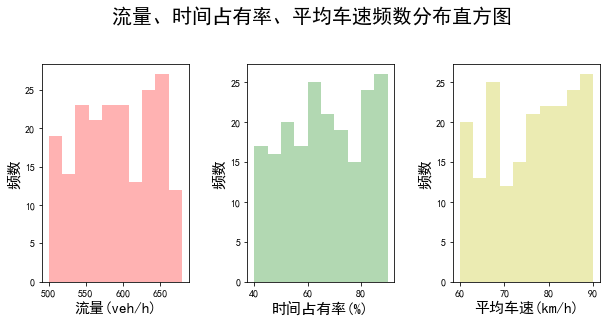

In [282]:
#绘制流量、时间占有率、平均车速频数分布直方图
plt.figsize=(1,3)

ax1=plt.subplot2grid((2,3),(0,0),colspan=1)
ax2=plt.subplot2grid((2,3),(0,1),colspan=1)
ax3=plt.subplot2grid((2,3),(0,2),colspan=1)

ax1.set_xlabel('流量(veh/h)',fontsize=15)
ax2.set_xlabel('时间占有率(%)',fontsize=15)
ax3.set_xlabel('平均车速(km/h)',fontsize=15)

ax1.set_ylabel('频数',fontsize=15)
ax2.set_ylabel('频数',fontsize=15)
ax3.set_ylabel('频数',fontsize=15)

ax1.hist(tra['流量(veh/h)'],10,facecolor='r',alpha=0.3);
ax2.hist(tra['时间占有率(%)'],10,facecolor='g',alpha=0.3);
ax3.hist(tra['平均车速(km/h)'],10,facecolor='y',alpha=0.3);

plt.subplots_adjust(wspace=0.4, hspace=0);
plt.suptitle('流量、时间占有率、平均车速频数分布直方图',fontsize=20)

Text(0.5, 0.98, '流量、时间占有率、平均车速箱型图')

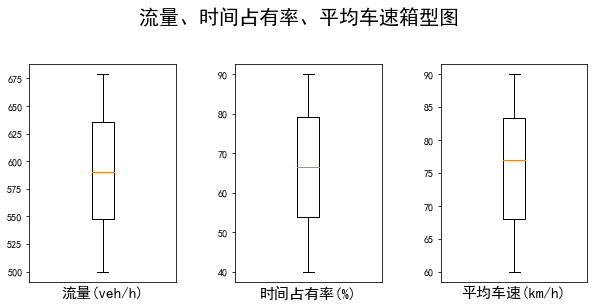

In [283]:
#绘制流量、时间占有率、平均车速箱型图
plt.figsize=(1,3)

ax1=plt.subplot2grid((2,3),(0,0),colspan=1)
ax2=plt.subplot2grid((2,3),(0,1),colspan=1)
ax3=plt.subplot2grid((2,3),(0,2),colspan=1)

ax1.set_xlabel('流量(veh/h)',fontsize=15)
ax2.set_xlabel('时间占有率(%)',fontsize=15)
ax3.set_xlabel('平均车速(km/h)',fontsize=15)

ax1.boxplot(tra['流量(veh/h)']);
ax2.boxplot(tra['时间占有率(%)']);
ax3.boxplot(tra['平均车速(km/h)']);

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

plt.subplots_adjust(wspace=0.4, hspace=0)
plt.suptitle('流量、时间占有率、平均车速箱型图',fontsize=20)

### 数据可视化分析——绘制QQ图继续正态分布检验 

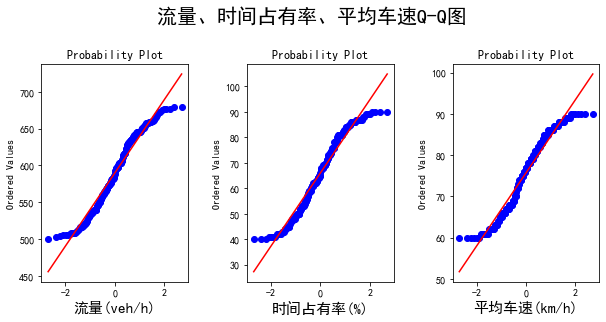

In [284]:
#绘制流量、时间占有率、平均车速Q-Q图
plt.figsize=(1,3)

ax1=plt.subplot2grid((2,3),(0,0),colspan=1)
ax2=plt.subplot2grid((2,3),(0,1),colspan=1)
ax3=plt.subplot2grid((2,3),(0,2),colspan=1)

stats.probplot(tra['流量(veh/h)'],dist="norm", plot=ax1);
stats.probplot(tra['时间占有率(%)'],dist="norm", plot=ax2);
stats.probplot(tra['平均车速(km/h)'],dist="norm", plot=ax3);

ax1.set_xlabel('流量(veh/h)',fontsize=15)
ax2.set_xlabel('时间占有率(%)',fontsize=15)
ax3.set_xlabel('平均车速(km/h)',fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0)
plt.suptitle('流量、时间占有率、平均车速Q-Q图',fontsize=20);

### 数据可视化分析——数据协方差矩阵及相关系数矩阵热度图

In [217]:
TRA = tra[['流量(veh/h)','时间占有率(%)','平均车速(km/h)']]
TRACOV=TRA.cov()
TRACORR=TRA.corr()

In [238]:
TRACOV

,流量(veh/h),时间占有率(%),平均车速(km/h)
流量(veh/h),2517.006329,96.578224,-34.292951
时间占有率(%),96.578224,211.164539,12.023646
平均车速(km/h),-34.292951,12.023646,81.341733


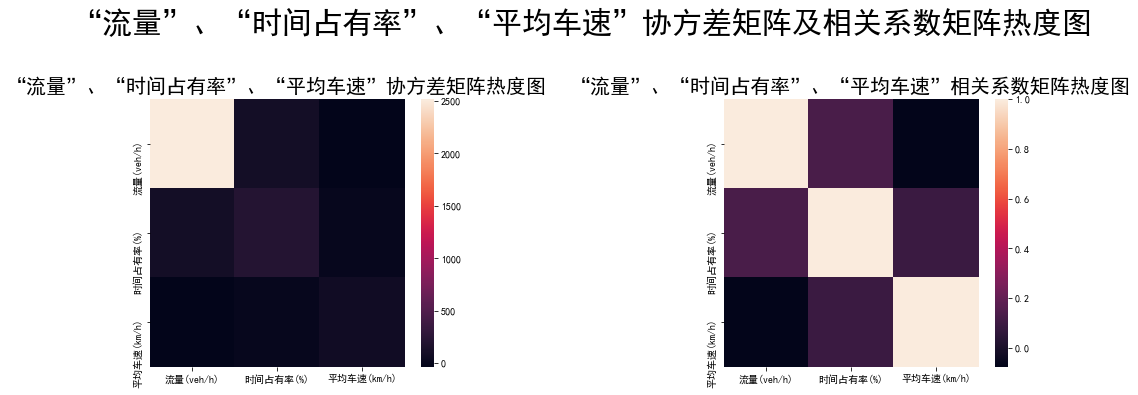

In [315]:
plt.rcParams['figure.figsize'] = (16,12.8)
import seaborn as sns
plt.figsize=(1,3)
ax1=plt.subplot2grid((2,3),(0,0),colspan=1)
ax2=plt.subplot2grid((2,3),(0,2),colspan=1)

sns.heatmap(TRACOV,ax=ax1);
sns.heatmap(TRACORR,ax=ax2);

ax1.set_title('“流量”、“时间占有率”、“平均车速”协方差矩阵热度图',fontsize=20);
ax2.set_title('“流量”、“时间占有率”、“平均车速”相关系数矩阵热度图',fontsize=20);

plt.subplots_adjust(wspace=-0.1, hspace=0.6)
plt.suptitle('“流量”、“时间占有率”、“平均车速”协方差矩阵及相关系数矩阵热度图',fontsize=30);

### 数据可视化——任意两变量之间散点图 

Text(0.5, 0.98, '流量、时间占有率、平均车速任意两变量之间散点图')

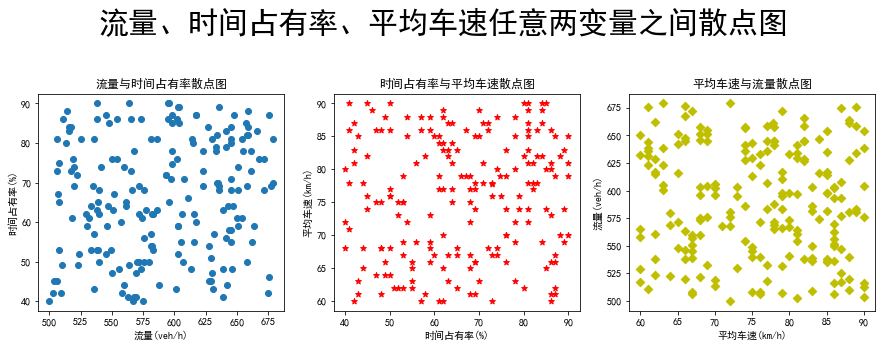

In [316]:
plt.rcParams['figure.figsize'] = (15,12)

plt.figsize=(1,3)

ax1=plt.subplot2grid((2,3),(0,0),colspan=1)
ax2=plt.subplot2grid((2,3),(0,1),colspan=1)
ax3=plt.subplot2grid((2,3),(0,2),colspan=1)

ax1.set_xlabel('流量(veh/h)')
ax2.set_xlabel('时间占有率(%)')
ax3.set_xlabel('平均车速(km/h)')

ax1.set_ylabel('时间占有率(%)')
ax2.set_ylabel('平均车速(km/h)')
ax3.set_ylabel('流量(veh/h)')

ax1.scatter(tra['流量(veh/h)'],tra['时间占有率(%)']);
ax2.scatter(tra['时间占有率(%)'],tra['平均车速(km/h)'],marker='*',c='r');
ax3.scatter(tra['平均车速(km/h)'],tra['流量(veh/h)'],marker='D',c='y');

ax1.set_title('流量与时间占有率散点图');
ax2.set_title('时间占有率与平均车速散点图');
ax3.set_title('平均车速与流量散点图');

plt.subplots_adjust(wspace=0.2, hspace=1)
plt.suptitle('流量、时间占有率、平均车速任意两变量之间散点图',fontsize=30)